In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.special import erfc, erf
from scipy.stats import skew
import matplotlib
import pickle

import os
import sys

In [3]:

# Get the current working directory
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

# Navigate to the sibling directory
sibling_dir = os.path.join(parent_dir, "00_analytical_function_setup")

# Add the sibling directory to sys.path for importing
if sibling_dir not in sys.path:
    sys.path.append(sibling_dir)

# Import the module from 00_analytical_function_setup
import analytical as a


## Load data and parse simulation details

In [4]:
df = pd.read_csv('data/Reward_Cumulative_20231102175340.csv')
df_new = pd.read_csv('data/Reward_Cumulative_20240606110707_landscape.csv')


In [5]:
threshold_vec=df['Unnamed: 0'].values

In [6]:
corr_val=np.linspace(0,1,num=11)

In [7]:
column_names = [str(i) for i in corr_val if str(i) in df.columns]
simresults = df[column_names].values

In [8]:
new_data=df_new.iloc[0].values
new_threshold_vec=np.linspace(-3,6,150)

## Generate data for the same parameters analytically

In [9]:
xvec=np.linspace(-3,6)
cvec=xvec
tmax=1000
corr=0.0
reward_vec=np.zeros(len(xvec))
rounds_vec=np.zeros(len(xvec))
invrsmills_vec_greater=np.zeros(len(xvec))
invrsmills_vec_less=np.zeros(len(xvec))
oneoverp_vec=np.zeros(len(xvec))
for i in range(len(xvec)):
    scaling_factor=a.scaling(corr)
    reward_vec[i]=a.estimated_cumulative_reward_sigma(xvec[i],tmax,scaling_factor)
optimum=cvec[np.argmax(reward_vec)] #optimal threshold

In [10]:
cdf = np.cumsum(reward_vec)
cdf /= cdf[-1]
median_index = np.where(cdf >= 0.5)[0][0]
median = cvec[median_index]
mean = 1.59# np.sum(cvec*(reward_vec/tmax))
mean_height = np.interp(mean, cvec, reward_vec/tmax)
median_height = np.interp(median, cvec, reward_vec/tmax)

In [11]:
threshold_vec=df['Unnamed: 0'].values

## Plot figure

In [12]:
# Custom black color
myblack = "#222222"
myaccent=myblack
mediumgrey='#abadaa'
lightgrey="#D3D3D3"
# Set font globally
matplotlib.rcParams['font.family'] = 'Helvetica, Arial, sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica, Arial, sans-serif'  # Fallback to Arial if Helvetica is not available
dpi=300

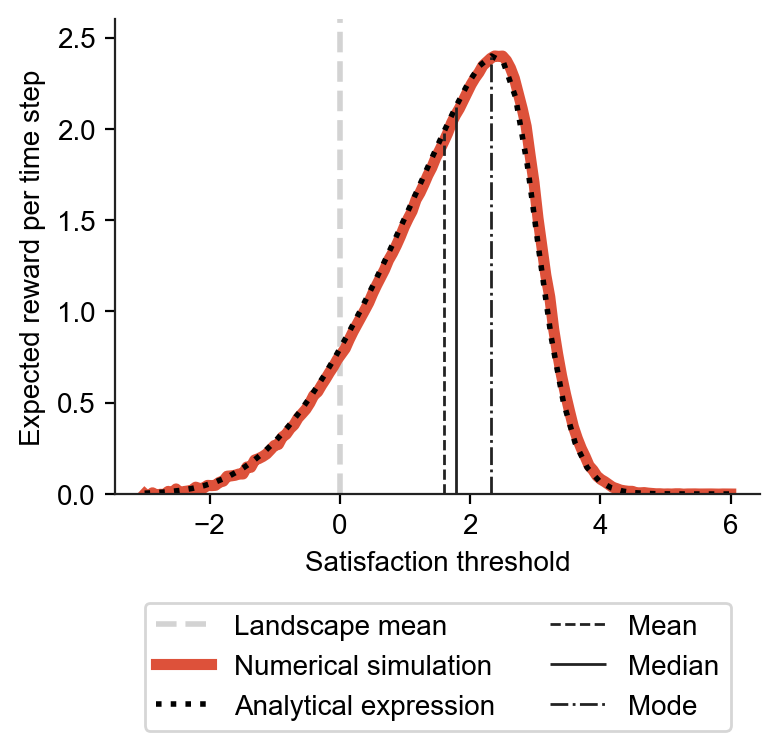

In [13]:


# Set the inferno color map
inferno = plt.cm.inferno

# Define colors
color1 =inferno(0.6)
color2 = myblack
color3 = 'lightgrey'


# Create a figure with specified size
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
ax.vlines(0, 0, 3, color=color3, linestyle='--', linewidth=2, label='Landscape mean')
# Plotting
# ax.plot(threshold_vec, simresults[:, 0], color=color1, linewidth=4)
ax.plot(new_threshold_vec, new_data, color=color1, linewidth=4)
ax.set_xlabel('Satisfaction threshold')

ax.plot(cvec, reward_vec/tmax, linestyle=':', color='k', linewidth=2)

# Adding vertical lines for mean, median, and mode

ax.vlines(mean, 0, mean_height, colors=color2, linestyles='--', linewidth=1, label='Mean')
ax.vlines(median, 0, median_height, colors=color2, linestyles='-', linewidth=1, label='Median')
ax.vlines(optimum, 0, np.max(reward_vec/tmax), color=color2, linestyle='-.', linewidth=1, label='Mode')


# Adding legend and setting plot limits

ax.legend(['Landscape mean','Numerical simulation', 'Analytical expression', 'Mean', 'Median', 'Mode'],frameon=True, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
ax.set_ylim(0, 2.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('')

# Adding labels
ax.set_ylabel('Expected reward per time step')
for spine in ax.spines.values():
    spine.set_color(myblack)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("output/figure_2.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()
